<a href="https://colab.research.google.com/github/danielsoy/ALOCC-CVPR2018/blob/master/VGG16_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2021-12-18 18:11:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  91.0MB/s    in 0.7s    

2021-12-18 18:11:50 (91.0 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
! unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

In [7]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

In [8]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [9]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [10]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [11]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [12]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [13]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [14]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [15]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [16]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [17]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [18]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [19]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [20]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [21]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [22]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [23]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(units=4096,activation="relu"))

In [26]:
model.add(Dense(units=4096,activation="relu"))

In [27]:
model.add(Dense(units=2, activation="softmax"))

In [52]:
from tensorflow.keras.optimizers import Adam # - Works

from keras.optimizers import adam_v2
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

opt = adam_v2.Adam(learning_rate=0.001 )

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse']) 


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [54]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


In [55]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.6938 - acc: 0.4906 - mse: 0.2503
Epoch 00001: val_acc improved from -inf to 0.51250, saving model to vgg16_1.h5
10/10 [==============================] - 14s 1s/step - loss: 0.6938 - acc: 0.4906 - mse: 0.2503 - val_loss: 0.6928 - val_acc: 0.5125 - val_mse: 0.2498
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.6923 - acc: 0.5281 - mse: 0.2496
Epoch 00002: val_acc did not improve from 0.51250
10/10 [==============================] - 11s 1s/step - loss: 0.6923 - acc: 0.5281 - mse: 0.2496 - val_loss: 0.6931 - val_acc: 0.5063 - val_mse: 0.2500
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.6951 - acc: 0.4572 - mse: 0.2510
Epoch 00003: val_acc did not improve from 0.51250
10/10 [==============================] - 10s 1s/step - loss: 0.6951 - acc: 0.4572 - mse: 0.2510 - val_loss: 0.6950 - val_acc: 0.4469 - val_mse: 0.2509
Epoch 4/10
10/10 [==============================] - ETA: 0s

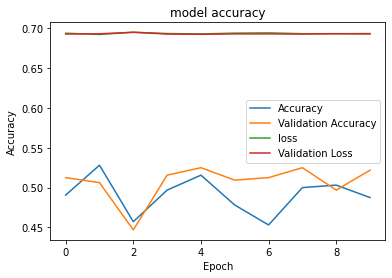

In [56]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

cat


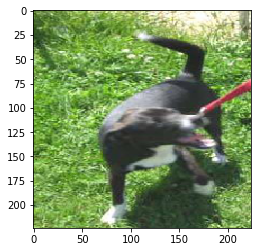

In [60]:
from keras.preprocessing import image
img = image.load_img("/content/cats_and_dogs_filtered/validation/dogs/dog.2000.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')